### Geometric Transformations of Images
#### Goals
* 변환, 회전, 아핀 변환 등과 같은 이미지에 다른 기하학적 변형을 적용하는 방법을 배웁니다.
* 다음 함수를 볼 수 있습니다 : cv2.getPerspectiveTransform

#### 변환
OpenCV는 모든 종류의 변형을 가질 수있는 두 가지 변환 함수, cv2.warpAffine 및 cv2.warpPerspective 를 제공합니다. cv2.warpPerspective 는 3x3 변환 행렬을 입력으로 받는 반면 cv2.warpAffine 은 2x3 변환 행렬을 사용합니다.

#### 크기조정
크기 조정은 이미지의 크기를 조정하는 것입니다. OpenCV는 이 목적으로 cv2.resize () 함수를 제공 합니다. 이미지의 크기는 수동으로 지정하거나 배율 인수를 지정할 수 있습니다. 다른 보간 방법이 사용됩니다. 바람직한 보간 방법은 cv2.INTER_AREA을 축소하고 대한 cv2.INTER_CUBIC (느리게) cv2.INTER_LINEAR 줌 기능. 디폴트에서는, 모든 사이즈 변경을 위해서 ( 때문에) 사용되는 보간 법은 cv2.INTER_LINEAR 입니다. 다음 방법 중 하나를 사용하여 입력 이미지의 크기를 조정할 수 있습니다.



In [2]:
import cv2
import numpy as np

img = cv2.imread('messi5.jpg')
res = cv2.resize(img, None, fx = 2, fy = 2, interpolation = cv2.INTER_CUBIC)

#다른 방법
height, width = img.shape[:2]
res2 = cv2.resize(img, (width * 2, height * 2), interpolation = cv2.INTER_CUBIC)


#### Translation
번역은 물체의 위치를 ​​이동시키는 것입니다. 여러분이 (x, y) 방향의 변화를 안다면, 다음과 같이 (t_x, t_y)변환 행렬 \ textbf {M}을 만들 수 있습니다 :

$$M = {begin {bmatrix} 1 & 0 & t_x \\ 0 & 1 & t_y \ end {bmatrix}$$

$$M = \left[\begin{array}{rr} 
1&0&t(x)\\
0&1&t(y)\\
\end{array}\right]$$

np.float32 유형의 Numpy 배열 로 만들고 cv2.warpAffine () 함수 로 전달할 수 있습니다. 아래 (100,50) 이동에 대한 예를 참조하십시오.

In [2]:
import cv2
import numpy as np

img = cv2.imread('messi5.jpg', 0)
rows, cols = img.shape

M   = np.float32([[1, 0, 100], [0, 1, 50]])
dst = cv2.warpAffine(img, M, (cols, rows))

cv2.imshow('src', img)
cv2.imshow('dst', dst)

cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

##### 경고 
cv2.warpAffine () 함수 의 세 번째 인수는 출력 이미지의 크기이며, 너비, 높이 형태 여야합니다 . 너비 = 열 수 및 높이 = 행 수를 기억하십시오.

#### 회전
각도의 이미지 회전은 \ theta다음과 같은 형식의 변환 행렬에 의해 수행됩니다.

M = \ begin {bmatrix} cos \ theta & -sin \ theta \\ sin \ theta & cos \ theta \ end {bmatrix}

그러나 OpenCV는 조정 가능한 회전 중심으로 크기가 조정 된 회전을 제공하므로 원하는 위치에서 회전 할 수 있습니다. 수정 된 변환 행렬은에 의해 주어진다.

cdot center.x - \ beta \ cdot center.y \\ - \ beta & \ alpha & \ beta \ cdot center.x + (1-alpha) \ alpha) \ cdot center.y \ end {bmatrix}

어디에:

\ begin {array} {l} \ alpha = 스케일 \ cdot \ cos \ theta, \\ \ beta = 스케일 \ cdot \ sin \ theta \ end {배열}

이 변환 행렬을 찾기 위해 OpenCV는 cv2.getRotationMatrix2D 함수를 제공합니다 . 크기 조정없이 중앙을 기준으로 이미지를 90도 회전시키는 아래의 예제를 확인하십시오.

In [ ]:
Mrotation = cv2.getRotationMatrix2D((cols / 2, rows / 2), 90, 1)
dst = cv2.warpAffine(img, Mrotation, (cols, rows))

cv2.imshow('src', img)
cv2.imshow('dst', dst)

cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

### 아핀 변환
아핀 변환에서 원본 이미지의 모든 평행선은 출력 이미지에서 여전히 평행합니다. 변환 행렬을 찾으려면 입력 이미지와 출력 이미지의 해당 위치에서 세 점이 필요합니다. 이어서 cv2.getAffineTransform는 에 전달되어야 할 경우 2x3 행렬 생성한다 cv2.warpAffine를 .

아래의 예를 선택하고 선택한 점 (녹색으로 표시)을 살펴보십시오.

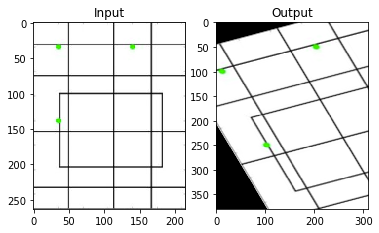

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

rows, cols = (380, 310)

img = cv2.imread('drawing.png')
resize = cv2.resize(img, (cols, rows), interpolation = cv2.INTER_CUBIC)

pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])

M = cv2.getAffineTransform(pts1, pts2)

dst = cv2.warpAffine(resize, M, (cols, rows))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

### Perspective Transformation
원근감 변환의 경우 3x3 변형 행렬이 필요합니다. 직선은 변환 후에도 직선으로 유지됩니다. 이 변환 행렬을 찾으려면 입력 이미지와 출력 이미지의 해당 점에 4 점이 필요합니다. 이 4 점 중 3 점은 동일 선상이 아니어야합니다. 그런 다음 변환 행렬은 cv2.getPerspectiveTransform 함수로 찾을 수 있습니다 . 그런 다음 이 3x3 변환 행렬로 cv2.warpPerspective 를 적용 하십시오 .

아래 코드를 참조하십시오.

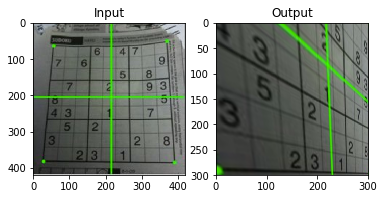

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('sudokusmall.png')

resize = cv2.resize(img, (420, 420), interpolation = cv2.INTER_CUBIC)

pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])

M = cv2.getPerspectiveTransform(pts1, pts2)

dst = cv2.warpPerspective(resize, M, (300,300))

plt.subplot(121),plt.imshow(resize),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()